# Temperature Prediction


# Temperature Forecast Project using ML
## Problem Statement:
## Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

### DataSet link:https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv

In [1]:
#Importing the libraries


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import ARDRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"E:\datatrained\temperature.csv")
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [3]:
df.shape

(7752, 25)

In [4]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [5]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7682.000000   7682.000000  7677.000000  7677.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.211568      2.969999      2.413961    14.668111     7.192004   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.963543    84.222862   
50%      13.000000     29.900000     23.400000    55.039024    89.793480   
75%      19.000000     32.000000     24.900000    67.190056    93.743629   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7677.000000       7677.000000  7677.000000  7677.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.947191          2.345347     2.183836    33.730589   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673499         22.089739     5.678705    37.266753   
50%           29.703426         23.760199     6.547470    56.865482   
75%           31.710450         25.152909     8.032276    84.223616   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7677.000000  ...  7677.000000  7677.000000  7677.000000  7752.000000   
mean      0.368774  ...     0.485003     0.278200     0.269407    37.544722   
std       0.262458  ...     1.762807     1.161809     1.206214     0.050352   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.146654  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.315697  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.575489  ...     0.018364     0.007896     0.000041    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7752.000000  7752.000000  7752.000000      7752.000000  7725.000000   
mean    126.991397    61.867972     1.257048      5341.502803    30.274887   
std       0.079435    54.279780     1.370444       429.158867     3.128010   
min     126.826000    12.370000     0.098475      4329.520508    17.400000   
25%     126.937000    28.700000     0.271300      4999.018555    28.200000   
50%     126.995000    45.716000     0.618000      5436.345215    30.500000   
75%     127.042000    59.832400     1.767800      5728.316406    32.600000   
max     127.135000   212.335000     5.178230      5992.895996    38.900000   

         Next_Tmin  
count  7725.000000  
mean     22.932220  
std       2.487613  
min      11.300000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [7]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [8]:
#Separating categorical and continuous variables
cont=[i for i in df.columns if df[i].nunique()>30 and i!='Date']
cat=[i for i in df.columns if df[i].nunique()<30]

0.514100    310
0.266100    310
1.231300    310
0.572100    310
2.785000    310
2.257900    310
5.178200    310
0.505500    310
0.222300    310
2.686500    310
0.133200    310
1.562900    310
0.155400    310
2.534800    310
0.145700    310
0.855200    310
0.098500    310
0.697000    310
0.593100    310
1.767800    310
0.412500    310
0.618000    310
0.271300    310
4.729600    310
0.623300    310
0.098475      1
5.178230      1
Name: Slope, dtype: int64

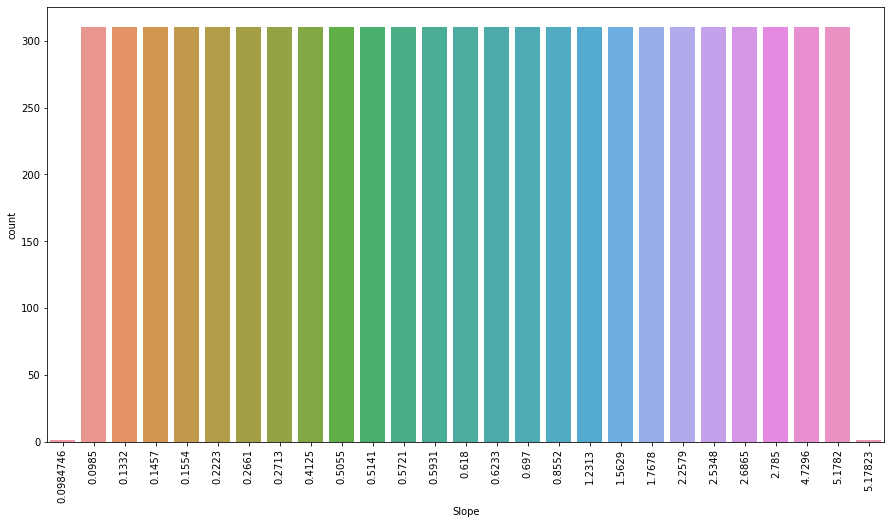

In [9]:
plt.figure(figsize=(15,8))
sns.countplot(x='Slope',data=df)
plt.xticks(rotation=90)
df['Slope'].value_counts()

212.3350    311
12.3700     311
30.0464     310
82.2912     310
15.5876     310
45.7160     310
17.2956     310
52.5180     310
208.5070    310
54.6384     310
59.8324     310
132.1180    310
30.9680     310
33.3068     310
53.4712     310
50.9312     310
44.7624     310
19.5844     310
26.2980     310
75.0924     310
28.7000     310
56.4448     310
35.0380     310
146.5540    310
21.9668     310
Name: DEM, dtype: int64

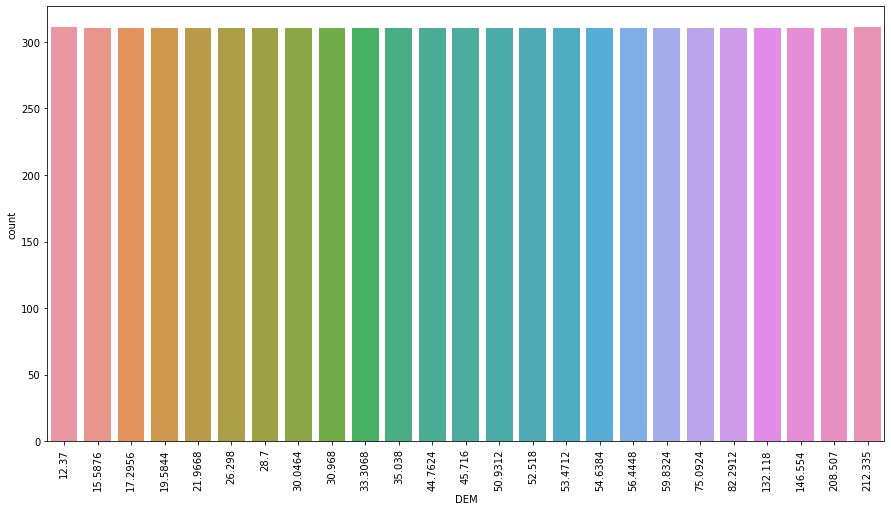

In [11]:
plt.figure(figsize=(15,8))
sns.countplot(x='DEM',data=df)
plt.xticks(rotation=90)
df['DEM'].value_counts()

37.5507    1240
37.5776    1240
37.6046     620
37.4967     620
37.5372     620
37.4697     620
37.5102     620
37.5237     620
37.6181     620
37.6450     311
37.4562     311
37.4832     310
Name: lat, dtype: int64

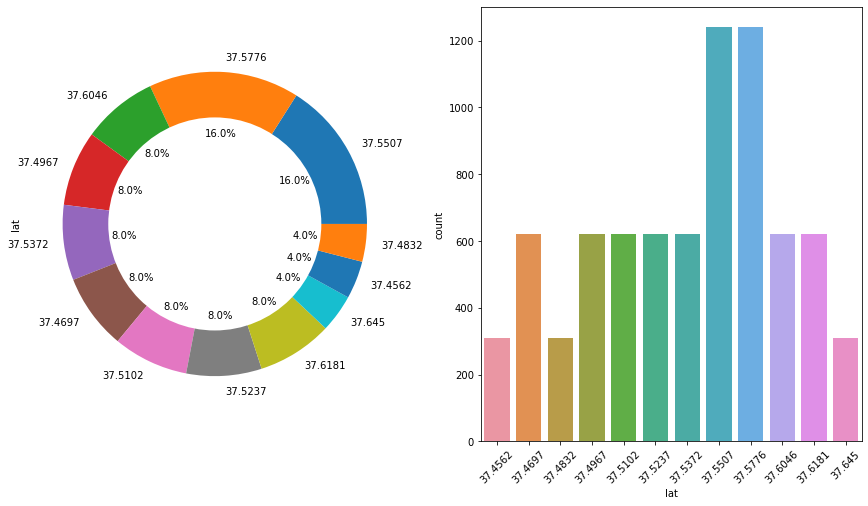

In [10]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['lat'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='lat',data=df)
plt.xticks(rotation=45)
df['lat'].value_counts()

15.0    310
21.0    310
7.0     310
23.0    310
8.0     310
3.0     310
10.0    310
16.0    310
11.0    310
2.0     310
13.0    310
12.0    310
9.0     310
24.0    310
4.0     310
25.0    310
22.0    310
17.0    310
19.0    310
20.0    310
1.0     310
5.0     310
18.0    310
6.0     310
14.0    310
Name: station, dtype: int64

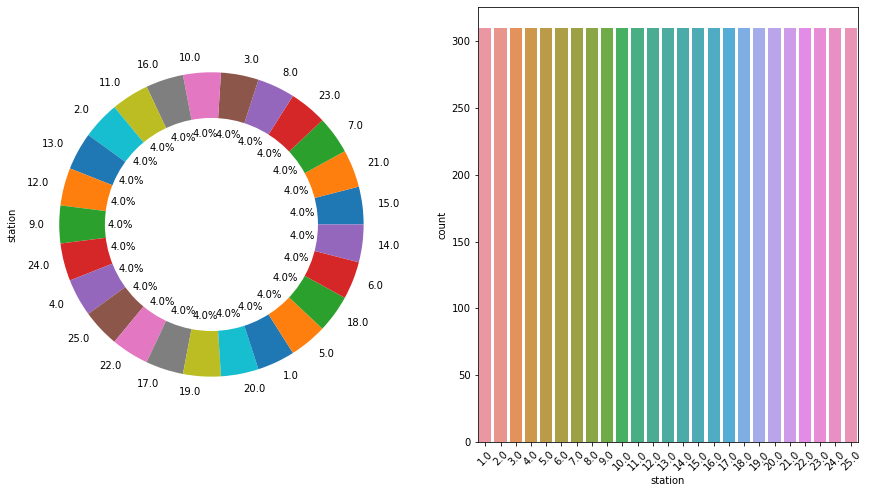

In [11]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['station'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='station',data=df)
plt.xticks(rotation=45)
df['station'].value_counts()

### As 27 missing values in target columns

In [12]:
df.dropna(axis=0, how='any', subset=['Next_Tmax', 'Next_Tmin'], inplace=True)

In [13]:
# Rtreating the Nan values

# filling these continous values using mean

df["Present_Tmax"] = df["Present_Tmax"].fillna(df["Present_Tmax"].mean())
df["Present_Tmin"] = df["Present_Tmin"].fillna(df["Present_Tmin"].mean())
df["LDAPS_RHmin"] = df["LDAPS_RHmin"].fillna(df["LDAPS_RHmin"].mean())
df["LDAPS_RHmax"] = df["LDAPS_RHmax"].fillna(df["LDAPS_RHmax"].mean())
df["LDAPS_Tmax_lapse"] = df["LDAPS_Tmax_lapse"].fillna(df["LDAPS_Tmax_lapse"].mean())
df["LDAPS_Tmin_lapse"] = df["LDAPS_Tmin_lapse"].fillna(df["LDAPS_Tmin_lapse"].mean())
df["LDAPS_WS"] = df["LDAPS_WS"].fillna(df["LDAPS_WS"].mean())
df["LDAPS_LH"] = df["LDAPS_LH"].fillna(df["LDAPS_LH"].mean())
df["LDAPS_CC1"] = df["LDAPS_CC1"].fillna(df["LDAPS_CC1"].mean())
df["LDAPS_CC2"] = df["LDAPS_CC2"].fillna(df["LDAPS_CC2"].mean())
df["LDAPS_CC3"] = df["LDAPS_CC3"].fillna(df["LDAPS_CC3"].mean())
df["LDAPS_CC4"] = df["LDAPS_CC4"].fillna(df["LDAPS_CC4"].mean())
df["LDAPS_PPT1"] = df["LDAPS_PPT1"].fillna(df["LDAPS_PPT1"].mean())
df["LDAPS_PPT2"] = df["LDAPS_PPT2"].fillna(df["LDAPS_PPT2"].mean())
df["LDAPS_PPT3"] = df["LDAPS_PPT3"].fillna(df["LDAPS_PPT3"].mean())
df["LDAPS_PPT4"] = df["LDAPS_PPT4"].fillna(df["LDAPS_PPT4"].mean())

In [14]:
# checking for null value in target columns:

df.isnull().sum()

station             2
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

### Observe the dataset:

In [15]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7723.000000   7725.000000   7725.000000  7725.000000  7725.000000   
mean     13.008157     29.769563     23.224631    56.741402    88.369140   
std       7.214034      2.959205      2.405561    14.583630     7.164028   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    46.045017    84.291199   
50%      13.000000     29.900000     23.400000    55.266701    89.699196   
75%      19.000000     32.000000     24.900000    66.996681    93.704353   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7725.000000       7725.000000  7725.000000  7725.000000   
mean          29.616253         23.511807     7.096739    62.468599   
std            2.932271          2.333987     2.171835    33.556339   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.696185         22.114277     5.686496    37.452979   
50%           29.664030         23.733589     6.564141    57.299645   
75%           31.687106         25.135301     7.996899    83.897461   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7725.000000  ...  7725.000000  7725.000000  7725.000000  7725.000000   
mean      0.368482  ...     0.484298     0.277121     0.269440    37.544755   
std       0.261052  ...     1.752597     1.152456     1.199982     0.050386   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.148229  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.319678  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.571547  ...     0.024035     0.009649     0.000703    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7725.000000  7725.000000  7725.000000      7725.000000  7725.000000   
mean    126.991370    61.926856     1.258725      5342.066031    30.274887   
std       0.079347    54.331701     1.371331       429.235277     3.128010   
min     126.826000    12.370000     0.098475      4329.520508    17.400000   
25%     126.937000    28.700000     0.271300      4999.018555    28.200000   
50%     126.995000    45.716000     0.618000      5437.534180    30.500000   
75%     127.042000    59.832400     1.767800      5728.624512    32.600000   
max     127.135000   212.335000     5.178230      5992.895996    38.900000   

         Next_Tmin  
count  7725.000000  
mean     22.932220  
std       2.487613  
min      11.300000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

In [16]:
len(df["Next_Tmax"])
len(df["Next_Tmin"])

7725

In [17]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month

### Understanding The DataSet:


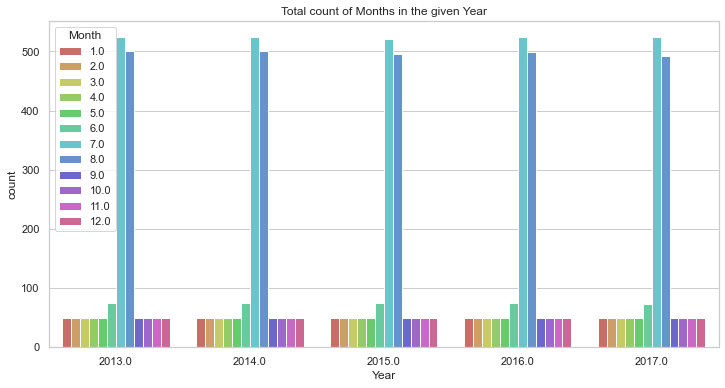

In [18]:
# Dataset consiste of information from the years 2013 to 2017:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Year", data=df, palette="hls", hue="Month").set(title='Total count of Months in the given Year')

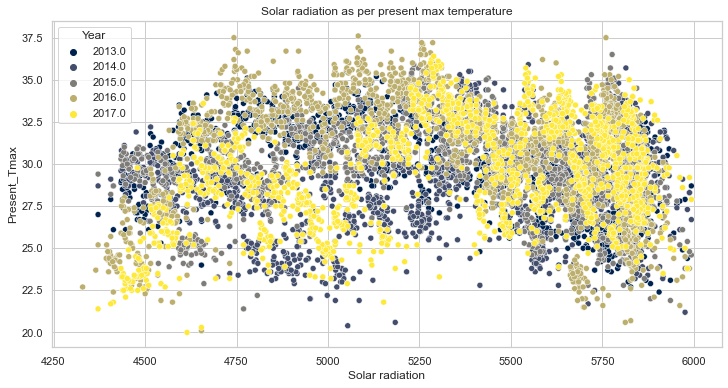

In [19]:
# Relationship between the present day temperature and solar radiation:
#Tmax:

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.scatterplot(data=df, x="Solar radiation", y="Present_Tmax", 
                hue="Year", palette="cividis").set(title='Solar radiation as per present max temperature')
plt.show()

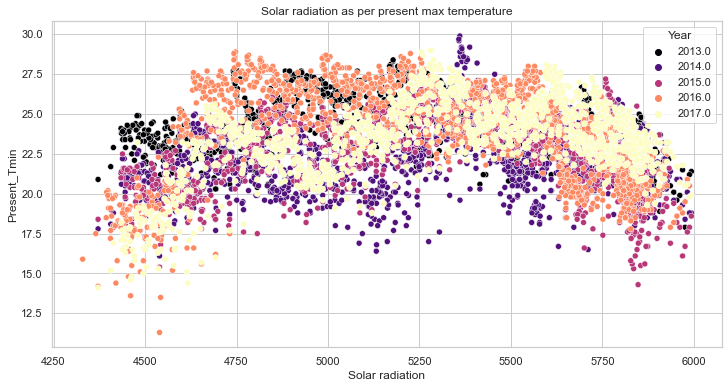

In [20]:
#Tmin:

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.scatterplot(data=df, x="Solar radiation", y="Present_Tmin", 
                hue="Year", palette="magma").set(title='Solar radiation as per present max temperature')
plt.show()

## Observe the geographic location of South Korea:

In [21]:
from geopy.geocoders import Nominatim
import time
from pprint import pprint

In [22]:
# instantiate a new Nominatim client
app = Nominatim(user_agent ="deepak")

In [23]:
# get location raw data
location = app.geocode("Coastal , South Korea" , language="en").raw
# print raw data
pprint(location)

{'boundingbox': ['35.3447567', '35.3685226', '126.3874366', '126.4059622'],
 'class': 'highway',
 'display_name': 'Haean-ro / Coastal Tourist Road, Daesin-ri, Yeonggwang-gun, '
                 'South Jeolla, 57011, South Korea',
 'importance': 0.4,
 'lat': '35.3591856',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '126.3942355',
 'osm_id': 732078784,
 'osm_type': 'way',
 'place_id': 247634219,
 'type': 'tertiary'}


### Get the Map location with the latitude, longitude

In [24]:
import plotly.express as px
import pandas as pd

fig = px.density_mapbox(df, lat='lat', lon='lon', radius=30, opacity=0.4, height=650,
                        zoom=5, center=dict(lat=35.3591856, lon=127.7669),
                        mapbox_style="stamen-toner")
fig.show()

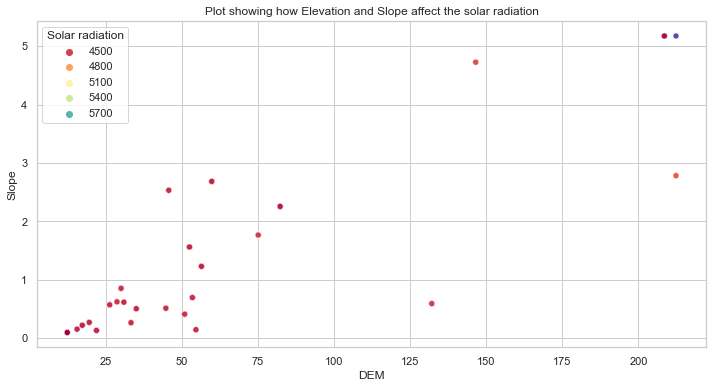

In [25]:
# Plot that at current geolocation, there seems to be more of DEM ( elevation) compared to Slope:

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.scatterplot(data=df, x="DEM", y="Slope", 
                hue="Solar radiation", palette="Spectral").set(title='Plot showing how Elevation and Slope affect the solar radiation')
plt.show()

#### we can also see that after 17.5 C and upto 28 C humidity has been somewhat consistent.

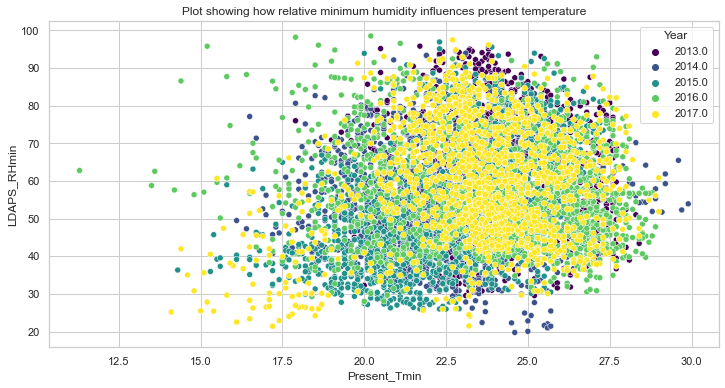

In [26]:
# Relationship between the approximate / relative minimum humidity and present temperature:

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.scatterplot(data=df, x="Present_Tmin", y="LDAPS_RHmin", 
                hue="Year", palette="viridis").set(title='Plot showing how relative minimum humidity influences present temperature')
plt.show()

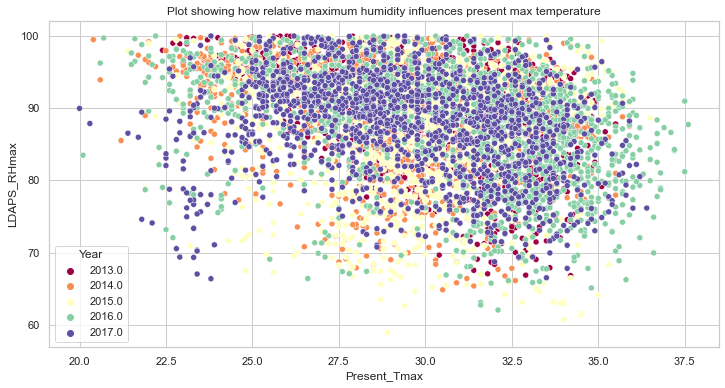

In [27]:

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.scatterplot(data=df, x="Present_Tmax", y="LDAPS_RHmax", 
                hue="Year", palette="Spectral").set(title='Plot showing how relative maximum humidity influences present max temperature')
plt.show()

<Figure size 864x432 with 0 Axes>

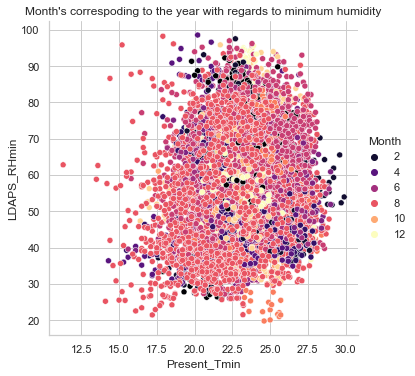

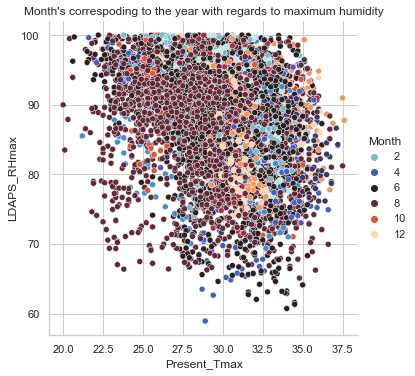

In [28]:
# From "June" and "August" seem to have both relative minimum and maximum humidity:

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.relplot(data=df, x="Present_Tmin", y="LDAPS_RHmin", 
            hue="Month", palette="magma").set(title="Month's correspoding to the year with regards to minimum humidity")

sns.relplot(data=df, x="Present_Tmax", y="LDAPS_RHmax", 
            hue="Month", palette="icefire").set(title="Month's correspoding to the year with regards to maximum humidity")
plt.show()

<Figure size 720x360 with 0 Axes>

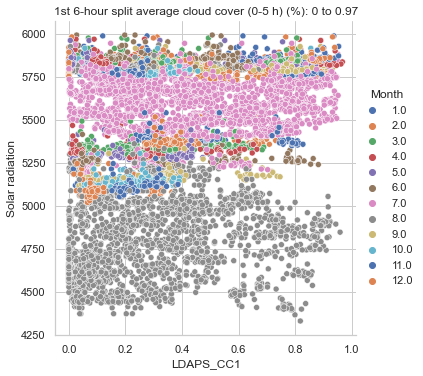

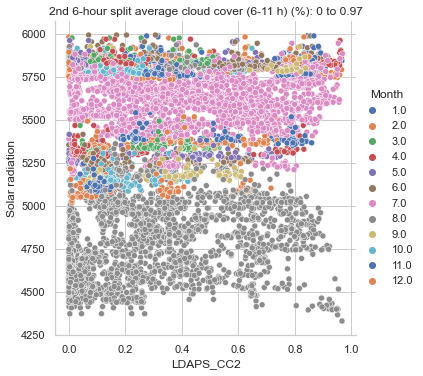

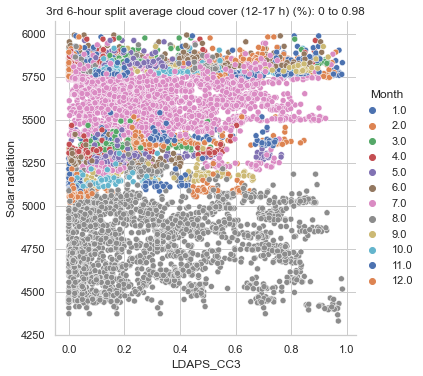

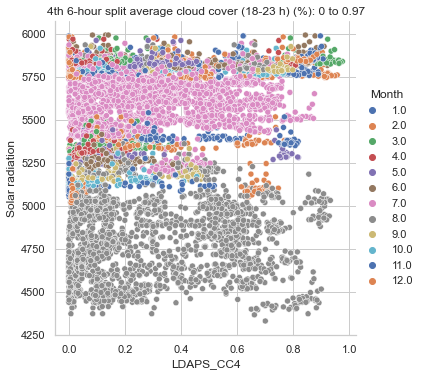

In [29]:
# Solar radiation is high consistently in the month of July and then in the month of August
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.relplot(data=df, x="LDAPS_CC1", y="Solar radiation", 
            hue="Month", palette="deep").set(title="1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97")

sns.relplot(data=df, x="LDAPS_CC2", y="Solar radiation", 
            hue="Month", palette="deep").set(title="2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97")

sns.relplot(data=df, x="LDAPS_CC3", y="Solar radiation", 
            hue="Month", palette="deep").set(title="3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98")

sns.relplot(data=df, x="LDAPS_CC4", y="Solar radiation", 
            hue="Month", palette="deep").set(title="4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97")
plt.show()

<AxesSubplot:title={'center':'Next day min Temperatures Vs Present day min Relative Humidity'}, xlabel='LDAPS_RHmin', ylabel='Next_Tmin'>

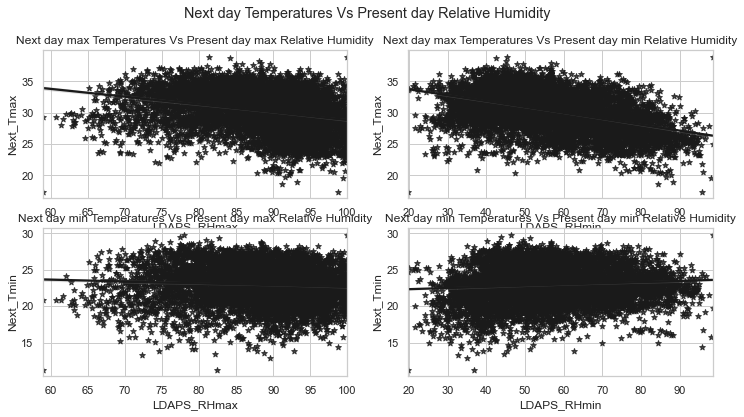

In [30]:

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

plt.suptitle('Next day Temperatures Vs Present day Relative Humidity')

plt.subplot(2,2,1)
plt.title('Next day max Temperatures Vs Present day max Relative Humidity')
sns.regplot(x='LDAPS_RHmax',y='Next_Tmax',data=df,marker='*',color='k')

plt.subplot(2,2,2)
plt.title('Next day max Temperatures Vs Present day min Relative Humidity')
sns.regplot(x='LDAPS_RHmin',y='Next_Tmax',data=df,marker='*',color='k')

plt.subplot(2,2,3)
plt.title('Next day min Temperatures Vs Present day max Relative Humidity')
sns.regplot(x='LDAPS_RHmax',y='Next_Tmin',data=df,marker='*',color='k')

plt.subplot(2,2,4)
plt.title('Next day min Temperatures Vs Present day min Relative Humidity')
sns.regplot(x='LDAPS_RHmin',y='Next_Tmin',data=df,marker='*',color='k')

## Z-score

In [31]:
from scipy.stats import zscore

z_score = zscore(df[['Present_Tmax', 'LDAPS_RHmin', 'LDAPS_RHmax',
                       'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
                       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
                       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope',
                       'Solar radiation']])

abs_zscore = np.abs(z_score)

filtering_entry = (abs_zscore < 3).all(axis=1)

df = df[filtering_entry]



# Dataset now:

df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  6904.000000   6904.000000   6904.000000  6904.000000  6904.000000   
mean     13.044612     29.921561     23.276438    55.521012    88.070946   
std       7.197673      2.869120      2.360943    13.832299     6.929590   
min       1.000000     21.200000     11.300000    19.794666    66.897522   
25%       7.000000     28.100000     21.700000    45.618697    83.894827   
50%      13.000000     30.000000     23.400000    54.262054    89.170044   
75%      19.000000     32.100000     24.900000    64.928831    93.397106   
max      25.000000     37.600000     29.900000    96.169815    99.999008   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       6904.000000       6904.000000  6904.000000  6904.000000   
mean          29.870628         23.624036     6.865369    62.024188   
std            2.744167          2.245041     1.837649    33.224624   
min           21.195428         16.517926     2.882580    -8.569043   
25%           28.008429         22.198063     5.628352    36.722658   
50%           29.884542         23.820666     6.461910    57.287139   
75%           31.797716         25.187678     7.730666    84.222469   
max           38.542255         29.619342    13.589191   161.661149   

         LDAPS_CC1  ...   LDAPS_PPT4          lat          lon          DEM  \
count  6904.000000  ...  6904.000000  6904.000000  6904.000000  6904.000000   
mean      0.344580  ...     0.088528    37.544032   126.990929    61.300961   
std       0.250441  ...     0.361911     0.050126     0.079541    53.672753   
min       0.000000  ...     0.000000    37.456200   126.826000    12.370000   
25%       0.137191  ...     0.000000    37.510200   126.937000    28.700000   
50%       0.297788  ...     0.000000    37.550700   126.995000    45.716000   
75%       0.499452  ...     0.000000    37.577600   127.042000    59.832400   
max       0.967277  ...     3.789353    37.645000   127.135000   212.335000   

             Slope  Solar radiation    Next_Tmax    Next_Tmin         Year  \
count  6904.000000      6904.000000  6904.000000  6904.000000  6904.000000   
mean      1.242805      5339.273003    30.547262    23.049942  2014.995510   
std       1.354583       422.418907     2.946644     2.409667     1.399119   
min       0.098500      4371.684570    20.800000    13.300000  2013.000000   
25%       0.271300      5014.173828    28.600000    21.500000  2014.000000   
50%       0.618000      5428.586426    30.700000    23.200000  2015.000000   
75%       1.767800      5717.971558    32.700000    24.700000  2016.000000   
max       5.178200      5992.895996    38.900000    29.800000  2017.000000   

             Month  
count  6904.000000  
mean      7.089948  
std       2.242283  
min       1.000000  
25%       7.000000  
50%       7.000000  
75%       8.000000  
max      12.000000  

[8 rows x 26 columns]

### Correlation 

In [32]:
corr_matrix = df.corr()
corr_matrix[["Next_Tmax", "Next_Tmin"]]

Next_Tmax  Next_Tmin
station            0.107961   0.128248
Present_Tmax       0.589422   0.618314
Present_Tmin       0.454487   0.791869
LDAPS_RHmin       -0.420328   0.145484
LDAPS_RHmax       -0.294704  -0.085369
LDAPS_Tmax_lapse   0.808703   0.551174
LDAPS_Tmin_lapse   0.544994   0.872281
LDAPS_WS          -0.276988  -0.015534
LDAPS_LH           0.167502  -0.056139
LDAPS_CC1         -0.444295   0.016623
LDAPS_CC2         -0.472727   0.087311
LDAPS_CC3         -0.482144   0.005922
LDAPS_CC4         -0.421009  -0.041453
LDAPS_PPT1        -0.223902  -0.023103
LDAPS_PPT2        -0.200552   0.010444
LDAPS_PPT3        -0.125766   0.027208
LDAPS_PPT4        -0.149026  -0.098500
lat               -0.049081  -0.079274
lon                0.005845  -0.050852
DEM               -0.157636  -0.241504
Slope             -0.088350  -0.141471
Solar radiation   -0.020947   0.091172
Next_Tmax          1.000000   0.587031
Next_Tmin          0.587031   1.000000
Year               0.094485   0.058585
Month             -0.013465  -0.025023

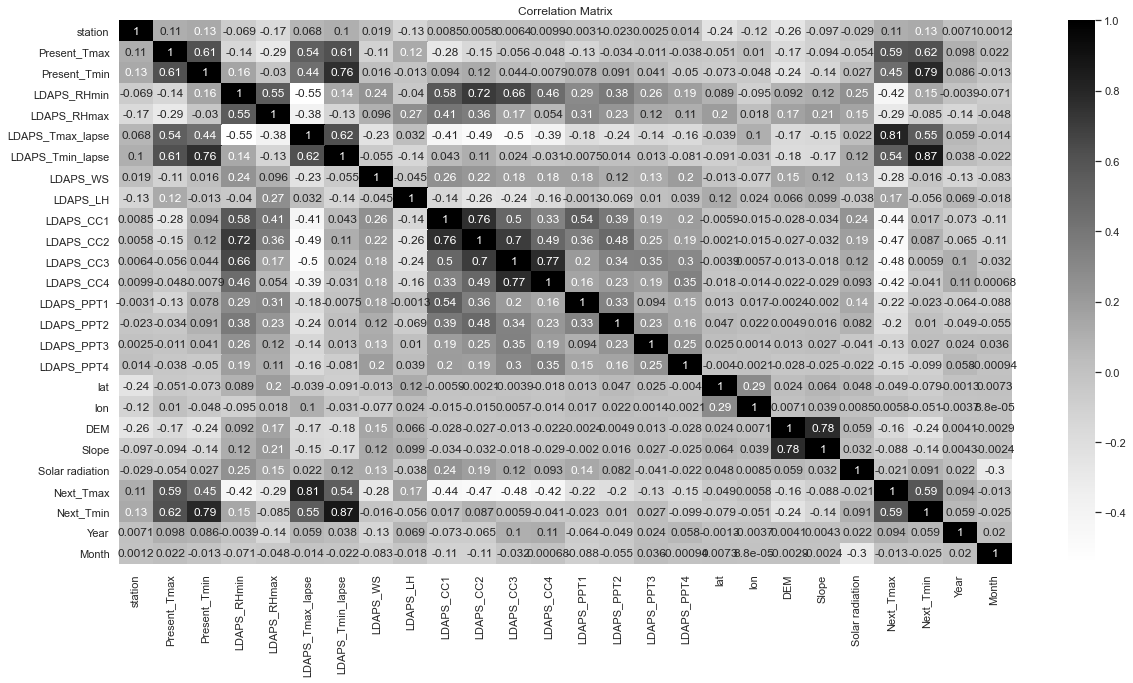

In [33]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, cmap='Greys')
plt.title("Correlation Matrix")
plt.show()

In [34]:
df.drop('Date',axis=1,inplace=True)

#### Split the dataset:

In [36]:
x = df.drop(columns = ["Next_Tmax", "Next_Tmin"], axis=1)
y = df[["Next_Tmax", "Next_Tmin"]]

#### Skewness check :

In [37]:
x.skew()

station            -0.002800
Present_Tmax       -0.278724
Present_Tmin       -0.333060
LDAPS_RHmin         0.307051
LDAPS_RHmax        -0.684618
LDAPS_Tmax_lapse   -0.106446
LDAPS_Tmin_lapse   -0.410665
LDAPS_WS            1.085527
LDAPS_LH            0.561378
LDAPS_CC1           0.596271
LDAPS_CC2           0.506058
LDAPS_CC3           0.701620
LDAPS_CC4           0.710085
LDAPS_PPT1          3.742993
LDAPS_PPT2          4.855280
LDAPS_PPT3          5.516516
LDAPS_PPT4          5.906318
lat                 0.102755
lon                -0.278256
DEM                 1.755616
Slope               1.588262
Solar radiation    -0.506093
Year                0.007356
Month              -0.684306
dtype: float64

In [38]:
# skewness variable
feat_skew = ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
               'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
               'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
               'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope',
               'Solar radiation']

In [39]:
df.shape

(6904, 26)

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.67352476, -0.42579235, -0.79484082, ...,  1.54744573,
        -1.42636481, -0.48612358],
       [-1.53458091,  0.68961297, -0.71012279, ...,  1.25486307,
        -1.42636481, -0.48612358],
       [-1.39563706,  0.58504372,  0.0099805 , ...,  1.24123382,
        -1.42636481, -0.48612358],
       ...,
       [ 1.38323998, -2.30803884, -2.61627855, ..., -2.12117383,
         1.43278381,  0.40588896],
       [ 1.52218383, -2.30803884, -2.36212445, ..., -2.13287025,
         1.43278381,  0.40588896],
       [ 1.66112768, -2.34289526, -2.4892015 , ..., -2.10215993,
         1.43278381,  0.40588896]])

#### Using PowerTransformer for further processing:

In [41]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [42]:
for i in cont:
    if np.abs(df[i].skew())>=0.5:
        df[i]=pt.fit_transform(df[i].values.reshape(-1,1))

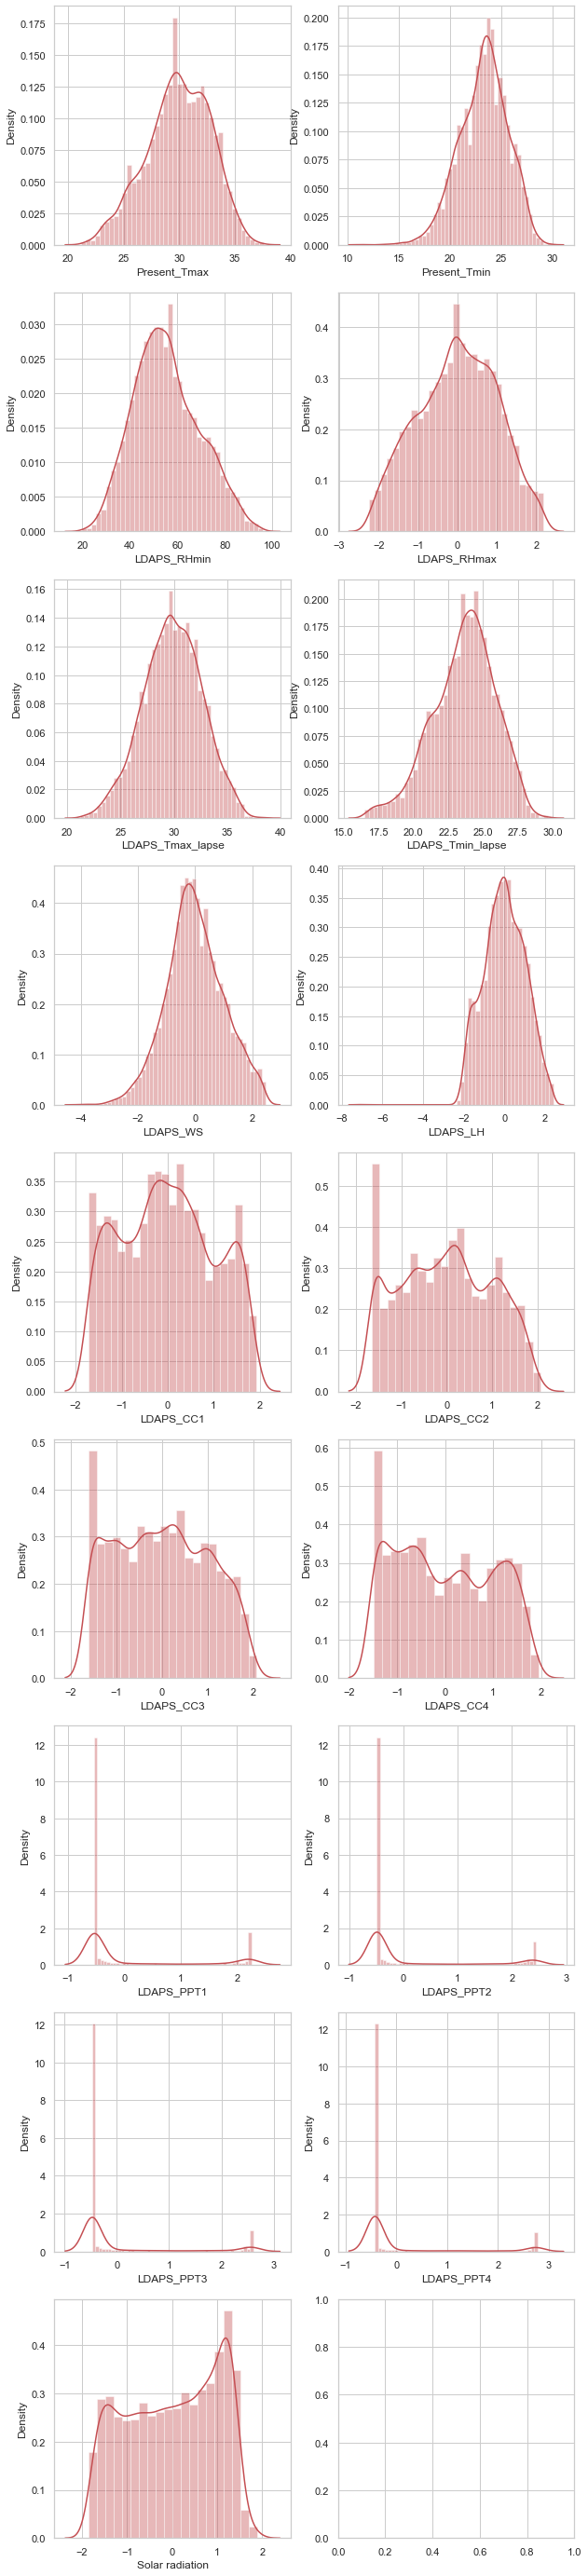

In [43]:
fig,ax=plt.subplots(9,2,figsize=(10,50))
r=0
c=0
for i, n in enumerate(cont[:-2]):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.distplot(df[n],color='r',ax=ax[r,c])
    c+=1

In [44]:
#Separating dependent and independent features.
x=df.copy()
x.drop(['Next_Tmax','Next_Tmin'],axis=1,inplace=True)
ymax=df['Next_Tmax']
ymin=df['Next_Tmin']

In [45]:
#Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [46]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

In [47]:
# Split into train and test dataset:

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state = 200)

### Creating Models:

In [48]:
# KNN

from sklearn.neighbors import KNeighborsRegressor

k_neigh = KNeighborsRegressor()
k_neigh.fit(x_train,y_train)

y_pred = k_neigh.predict(x_test)

print("Adjusted R2 squared : ",k_neigh.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9020408978427066
Mean Absolute Error (MAE):  0.7561052123552116
Mean Squared Error (MSE):  1.0222004826254838
Root Mean Squared Error (RMSE):  1.011039308150521


In [49]:
# RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)

y_pred = rf_reg.predict(x_test)

print("Adjusted R2 squared : ",rf_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9840565922260536
Mean Absolute Error (MAE):  0.6762251447876437
Mean Squared Error (MSE):  0.8264204360521235
Root Mean Squared Error (RMSE):  0.9090766942629888


In [50]:
# ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor

ext_reg = ExtraTreesRegressor()
ext_reg.fit(x_train,y_train)

y_pred = ext_reg.predict(x_test)

print("Adjusted R2 squared : ",ext_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  1.0
Mean Absolute Error (MAE):  0.5829017857142849
Mean Squared Error (MSE):  0.6096591344111961
Root Mean Squared Error (RMSE):  0.7808067202651345


### Cross-validation:

In [51]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(rf_reg, x, y, cv=5)
print("Cross Validation score of RandomForestRegressor model is:", scr.mean())

scr = cross_val_score(k_neigh, x, y, cv=5)
print("Cross Validation score of KNeighborsRegressor model is:", scr.mean())

scr = cross_val_score(ext_reg, x, y, cv=5)
print("Cross Validation score of ExtraTreesRegressor model is:", scr.mean())

Cross Validation score of RandomForestRegressor model is: 0.7019718547762143
Cross Validation score of KNeighborsRegressor model is: 0.34647418875114167
Cross Validation score of ExtraTreesRegressor model is: 0.7086683079953077


### Hyper Parameter Tuning


In [52]:
parameters = {"criterion":["mse", "mae"],
              "max_features":["auto", "sqrt", "log2"],
              "oob_score":[True, False],
              "random_state":[30, 50, 70, 100, 120]
              }

In [55]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint
pprint(rf_reg.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [53]:
# Using RandomizedSearchCV:

from sklearn.model_selection import RandomizedSearchCV
RCV = RandomizedSearchCV(RandomForestRegressor(), parameters, cv=5, n_iter=10)
RCV.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'oob_score': [True, False],
                                        'random_state': [30, 50, 70, 100, 120]})

In [56]:
RCV.best_params_

{'random_state': 70,
 'oob_score': True,
 'max_features': 'log2',
 'criterion': 'mse'}

### Re-build model:


In [58]:
from sklearn.model_selection import GridSearchCV

GCV = GridSearchCV(RandomForestRegressor(), parameters, cv=5)

In [60]:
rf_reg_tuned = LinearRegression(copy_X=True , n_jobs=1 , normalize=False)
rf_reg_tuned.fit(x_train,y_train)
rf_reg_tuned_ypred = rf_reg_tuned.predict(x_test)
r2_score_rf_tuned = r2_score(y_test,rf_reg_tuned_ypred)

print("Adjusted R2 squared : ",rf_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9840565922260536
Mean Absolute Error (MAE):  0.5829017857142849
Mean Squared Error (MSE):  0.6096591344111961
Root Mean Squared Error (RMSE):  0.7808067202651345


### Save Model:

In [62]:
import joblib
 
joblib.dump(rf_reg_tuned,"Temperature_Prediction.pkl")

['Temperature_Prediction.pkl']

In [63]:
model = joblib.load("Temperature_Prediction.pkl")

prediction = model.predict(x_test)

prediction=pd.DataFrame(prediction)
prediction

0          1
0     28.883608  21.045408
1     34.007954  26.051883
2     33.217329  22.208902
3     30.918967  21.126592
4     27.595863  19.370407
...         ...        ...
2067  33.488419  26.741985
2068  32.763778  22.854822
2069  32.564650  25.375430
2070  26.672672  17.998703
2071  29.877033  23.388726

[2072 rows x 2 columns]